# 単線形回帰

## ライブラリのインポート

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

## データの読み込み

In [2]:
# データの読み込み
data = pd.read_csv('1.01. Simple linear regression.csv')

# 中身の確認
data.head()

SAT   GPA
0  1714  2.40
1  1664  2.52
2  1760  2.54
3  1685  2.74
4  1693  2.83

## 回帰の作成

### 従属変数と独立変数の宣言

In [3]:
# 独立変数の宣言
x = data['SAT']

# 従属変数の宣言
y = data['GPA']

In [4]:
# 形状の確認
x.shape

(84,)

In [5]:
y.shape

(84,)

In [6]:
# sklearnに入れるデータの形状は2D arrayでなければいけないので
# reshapeメソッドを使って形状を変えていきます。

# x_matrix = x.values.reshape(84,1)
x_matrix = x.values.reshape(-1,1)

# 形状の確認
x_matrix.shape

(84, 1)

### 回帰


In [7]:
# クラスからオブジェクトを作成します
reg = LinearRegression()

In [8]:
# データを入れてモデルにフィットさせていきます
reg.fit(x_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 決定係数

In [9]:
# scoreメソッドを使って決定係数を求めていきます
reg.score(x_matrix,y)

0.40600391479679765

### 係数

In [10]:
# 係数を出力します
reg.coef_

array([0.00165569])

### 切片

In [11]:
# 切片を出力します
reg.intercept_

0.2750402996602803

### 予測

In [12]:
# predictメソッドを使って値を予測していきます
reg.predict(1740)

array([3.15593751])

In [13]:
# データフレームを作成します
new_data = pd.DataFrame(data=[1740,1760],columns=['SAT'])
new_data

SAT
0  1740
1  1760

In [14]:
# 上記のデータに対する予測値を出力します
reg.predict(new_data)

array([3.15593751, 3.18905127])

In [15]:
# データフレームに結果を追加します
new_data['Predicted_GPA'] = reg.predict(new_data)
new_data

SAT  Predicted_GPA
0  1740       3.155938
1  1760       3.189051

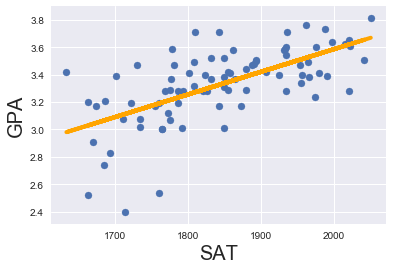

In [16]:
# データを散布図として表示します
plt.scatter(x,y)

# 変数を使った回帰式
yhat = reg.coef_*x_matrix + reg.intercept_

# 変数を使わない回帰式
#yhat = 0.0017*x + 0.275

# 回帰直線の表示
fig = plt.plot(x,yhat, lw=4, c='orange', label ='regression line')

# 軸に名前を付けます
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()